In [1]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# First Data

## Gene Only

In [2]:
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'ori data', 'gene_only')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = encoder.predict(train_data[:N_predict])
# Perform TSNE on 2 components so we can visualise it.
train_encoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
train_unencoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(train_data[:N_predict])

Reading Data in data/first/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


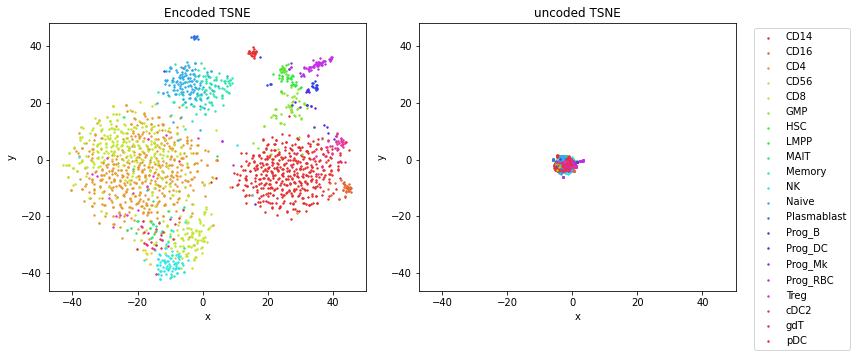

In [3]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
vis_data2d(train_encoded, train_unencoded, train_labels, labels_encoder, color_map, 2000)

## Gene and Protein

In [4]:
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)

In [5]:
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'ori data', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_train_data[:N_predict],pro_train_data[:N_predict]])
# Perform TSNE on 2 components so we can visualise it.
train_encoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
train_unencoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(train_data[:N_predict])

MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


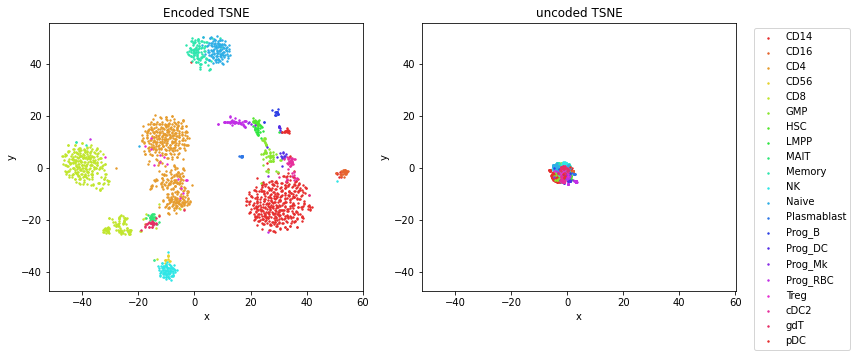

In [6]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
vis_data2d(train_encoded, train_unencoded, train_labels, labels_encoder, color_map, 2000)

## Hypertuning Experimentation

In [7]:
NHG = [2]
NHP = [1,2]
div_rates = [4]
encoding_dims = [64]
saved_model_dir_name = 'ori_data'
name = 'gene_pro'
EPOCH, N_HIDDEN_GENE, N_HIDDEN_PROTEIN, DIVRATE, ENCODING_DIM = hyper_tune_models(pro_train_data,
                                                                                  gene_train_data,
                                                                                  pro_test_data, 
                                                                                  gene_test_data,
                                                                                  NHG, NHP, 
                                                                                  div_rates, 
                                                                                  encoding_dims,
                                                                                  saved_model_dir_name, 
                                                                                  name)

EPOCH, N_HIDDEN_GENE, N_HIDDEN_PROTEIN, DIVRATE, ENCODING_DIM

Epoch 1/7
576/576 [==============================] - 10s 14ms/step - loss: 1.6771 - dense_6_loss: 0.7415 - dense_8_loss: 0.9356 - val_loss: 1.4522 - val_dense_6_loss: 0.6761 - val_dense_8_loss: 0.7761
Epoch 2/7
576/576 [==============================] - 7s 12ms/step - loss: 1.4044 - dense_6_loss: 0.6859 - dense_8_loss: 0.7184 - val_loss: 1.3342 - val_dense_6_loss: 0.6695 - val_dense_8_loss: 0.6648
Epoch 3/7
576/576 [==============================] - 7s 12ms/step - loss: 1.3282 - dense_6_loss: 0.6814 - dense_8_loss: 0.6468 - val_loss: 1.2937 - val_dense_6_loss: 0.6659 - val_dense_8_loss: 0.6278
Epoch 4/7
576/576 [==============================] - 7s 12ms/step - loss: 1.2999 - dense_6_loss: 0.6774 - dense_8_loss: 0.6225 - val_loss: 1.2755 - val_dense_6_loss: 0.6635 - val_dense_8_loss: 0.6120
Epoch 5/7
576/576 [==============================] - 7s 12ms/step - loss: 1.2864 - dense_6_loss: 0.6744 - dense_8_loss: 0.6119 - val_loss: 1.2657 - val_dense_6_loss: 0.6623 - val_dense_8_loss: 0.6033

(6, 2, 1, 4, 64)

# Second Data

Reading Data in data/second/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


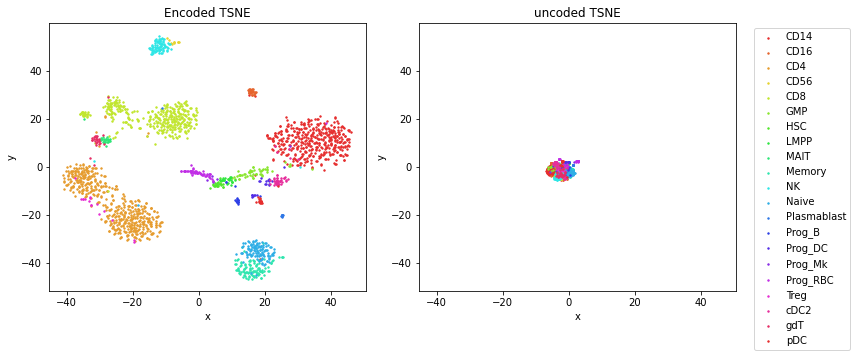

In [9]:
data_directory = 'data/second'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'second data', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 2000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_train_data[:N_predict],pro_train_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
train_encoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
train_unencoded = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(train_data[:N_predict])
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
vis_data2d(train_encoded, train_unencoded, train_labels, labels_encoder, color_map, 2000)